In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Initial structures load
File_to_work_with = '../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx'
initial = pd.read_excel(File_to_work_with)
initial = initial.columns.values.tolist()
initial = initial[4:]
print(initial)
print(len(initial))

['O=C(C=C1C)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O', 'CCC1=NC=CN1CC2=CNC3=CC=CC=C32', 'CC1=NC=CN1CC2=CNC3=CC=CC=C32', 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3', 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1', 'O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21', 'CCC1=NC(C)=CN1CC2=CNC3=CC=CC=C32', 'O=C(CC1=O)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O', 'S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32', 'CC(C)OCC1=CNC2=CC=CC=C21', 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3', '[N-]=[N+]=NCC1=CC(CN=[N+]=[N-])=CC(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)=C1', 'ClC1=C(Cl)N(C=N1)CC2=CNC3=CC=CC=C32', 'CN(C)CC1=CN(C2=C1C=CC=C2)CC3=CNC4=CC=CC=C43', 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1', 'O=C(C(C)=C1)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O', 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2', 'C12=CC=CC=C1NC=C2COCC3=CN(CCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3', 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3', 'CCCCCOCC1=CNC2=CC=CC=C21', 'C12=CC=CC=

In [3]:
#New structures load
new_str = '../Data/Whole_report.xlsx'
new = pd.read_excel(new_str)
new = new['SMILES']
print(new[0:5])
print(len(new))

0             CC(=O)n1cc(COc2ccccc2)c2ccccc21
1    CN(C)CC(=CN(C)Cc1c[nH]c2ccccc12)c1ccccc1
2                    CC(C)CCOc1c[nH]c2ccccc12
3                    CC(C)COCc1c[nH]c2ccccc12
4                   CCOCc1cn(C(C)=O)c2ccccc12
Name: SMILES, dtype: object
213


In [4]:
def prepare_fingerprints(smi_list1, smi_list2):
    mol_l1 = [Chem.MolFromSmiles(smi) for smi in smi_list1]
    mol_l2 = [Chem.MolFromSmiles(smi) for smi in smi_list2]
    
    fingerprint_list1 = [Chem.RDKFingerprint(mol) for mol in mol_l1]
    
    fingerprint_list2 = [Chem.RDKFingerprint(mol) for mol in mol_l2]
    
    return fingerprint_list1, fingerprint_list2

In [5]:
def calculate_similarity(finger, finger_list):
    
    similarity = []
    for sim in finger_list:
        similarity.append(TanimotoSimilarity(sim, finger))
        
    return similarity
    
    

In [6]:
finger_ini, finger_new = prepare_fingerprints(initial, new)

In [7]:
final_list = initial.copy()
for i, element in enumerate(finger_ini):
    final_list[i] = calculate_similarity(element, finger_new)

In [8]:
len(final_list[0])

213

In [9]:
xc = []
for i in range(len(finger_ini)):
    xc.extend(final_list[i])

In [10]:
print(len(xc))

9372


In [11]:
xc[0]

0.3598993288590604

In [12]:
final_df = pd.DataFrame(columns=[initial])
final_df['New structures'] = 0

In [13]:
final_df

,O=C(C=C1C)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,CCC1=NC=CN1CC2=CNC3=CC=CC=C32,CC1=NC=CN1CC2=CNC3=CC=CC=C32,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1,O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21,CCC1=NC(C)=CN1CC2=CNC3=CC=CC=C32,O=C(CC1=O)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32,CC(C)OCC1=CNC2=CC=CC=C21,...,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=S,CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32,O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,C12=CC=CC=C1C(CN3C=CN=C3)=CN2,C12=CC=CC=C1C(CN3C(C=CC=C4)=C4N=C3)=CN2,[N-]=[N+]=NCC1=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=CC=C1,CC(C)CCOCC1=CNC2=CC=CC=C21,CCCOCC1=CNC2=CC=CC=C21,New structures


In [14]:
cols = final_df.columns.tolist()
new_order = cols[-1:]+cols[:-1]
final_df = final_df[new_order]

In [15]:
final_df

,New structures,O=C(C=C1C)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,CCC1=NC=CN1CC2=CNC3=CC=CC=C32,CC1=NC=CN1CC2=CNC3=CC=CC=C32,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1,O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21,CCC1=NC(C)=CN1CC2=CNC3=CC=CC=C32,O=C(CC1=O)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32,...,O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=O,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=S,CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32,O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,C12=CC=CC=C1C(CN3C=CN=C3)=CN2,C12=CC=CC=C1C(CN3C(C=CC=C4)=C4N=C3)=CN2,[N-]=[N+]=NCC1=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=CC=C1,CC(C)CCOCC1=CNC2=CC=CC=C21,CCCOCC1=CNC2=CC=CC=C21


In [16]:
final_df['New structures'] = new

In [17]:
for i, ini_smi in enumerate(initial):
    final_df[ini_smi] = final_list[i]

In [18]:
final_df

,New structures,O=C(C=C1C)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,CCC1=NC=CN1CC2=CNC3=CC=CC=C32,CC1=NC=CN1CC2=CNC3=CC=CC=C32,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1,O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21,CCC1=NC(C)=CN1CC2=CNC3=CC=CC=C32,O=C(CC1=O)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32,...,O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=O,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=S,CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32,O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,C12=CC=CC=C1C(CN3C=CN=C3)=CN2,C12=CC=CC=C1C(CN3C(C=CC=C4)=C4N=C3)=CN2,[N-]=[N+]=NCC1=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=CC=C1,CC(C)CCOCC1=CNC2=CC=CC=C21,CCCOCC1=CNC2=CC=CC=C21
0,CC(=O)n1cc(COc2ccccc2)c2ccccc21,0.359899,0.361197,0.358754,0.420561,0.383609,0.761548,0.364440,0.356742,0.360836,...,0.360119,0.420561,0.361220,0.358149,0.392437,0.360637,0.385321,0.417674,0.442893,0.447028
1,CN(C)CC(=CN(C)Cc1c[nH]c2ccccc12)c1ccccc1,0.318891,0.352550,0.360560,0.357219,0.340541,0.353973,0.355042,0.464208,0.374396,...,0.337539,0.357219,0.353003,0.348060,0.365469,0.366127,0.349036,0.366251,0.391421,0.394809
2,CC(C)CCOc1c[nH]c2ccccc12,0.244529,0.260652,0.267643,0.261962,0.239300,0.250569,0.254079,0.256637,0.253731,...,0.255042,0.261962,0.250000,0.255448,0.229643,0.274170,0.269417,0.243326,0.316294,0.305825
3,CC(C)COCc1c[nH]c2ccccc12,0.304734,0.394809,0.413743,0.548480,0.309959,0.550139,0.365457,0.358914,0.424886,...,0.361675,0.548480,0.375158,0.389696,0.392418,0.439103,0.374352,0.456057,0.946636,0.980723
4,CCOCc1cn(C(C)=O)c2ccccc12,0.360415,0.367742,0.367003,0.484270,0.377460,0.954155,0.361055,0.357212,0.364679,...,0.364948,0.484270,0.370256,0.365828,0.423519,0.372760,0.392781,0.450884,0.575145,0.580265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,[N-]=[N+]=NCc1ccc(Cn2cc(CC(=O)c3ccccc3N)nn2)cc1,0.272370,0.238498,0.228155,0.276119,0.250591,0.224826,0.249101,0.233191,0.197483,...,0.232914,0.276119,0.235925,0.241950,0.311956,0.204431,0.227642,0.420317,0.172165,0.167883
209,[N-]=[N+]=NCc1ccccc1Cn1cc(CC(=O)c2ccccc2N)nn1,0.288432,0.249775,0.235675,0.276596,0.270291,0.241004,0.262748,0.248768,0.204232,...,0.242894,0.276596,0.250000,0.253968,0.333076,0.209924,0.240035,0.501411,0.177215,0.172075
210,C=C(C=CNCC(C)=O)Cn1cc(Cn2cc(COCC)c3ccccc32)nn1,0.413925,0.369353,0.365050,0.541063,0.399691,0.529412,0.383562,0.357085,0.327289,...,0.372852,0.541063,0.371380,0.372498,0.524272,0.350095,0.406028,0.491482,0.417879,0.420886
211,CC(=O)CNCNCCCn1cc(COCc2c[nH]c3ccccc23)nn1,0.351145,0.363252,0.369878,0.855956,0.333618,0.477564,0.361000,0.348197,0.375427,...,0.352467,0.855956,0.352295,0.372793,0.642137,0.364486,0.366530,0.610334,0.521262,0.527273


In [19]:
final_df.to_excel('../Data/SYBA_selected_structures_similarity.xlsx')

In [20]:
total_hist = pd.DataFrame(data=xc, columns=['All similarities'])

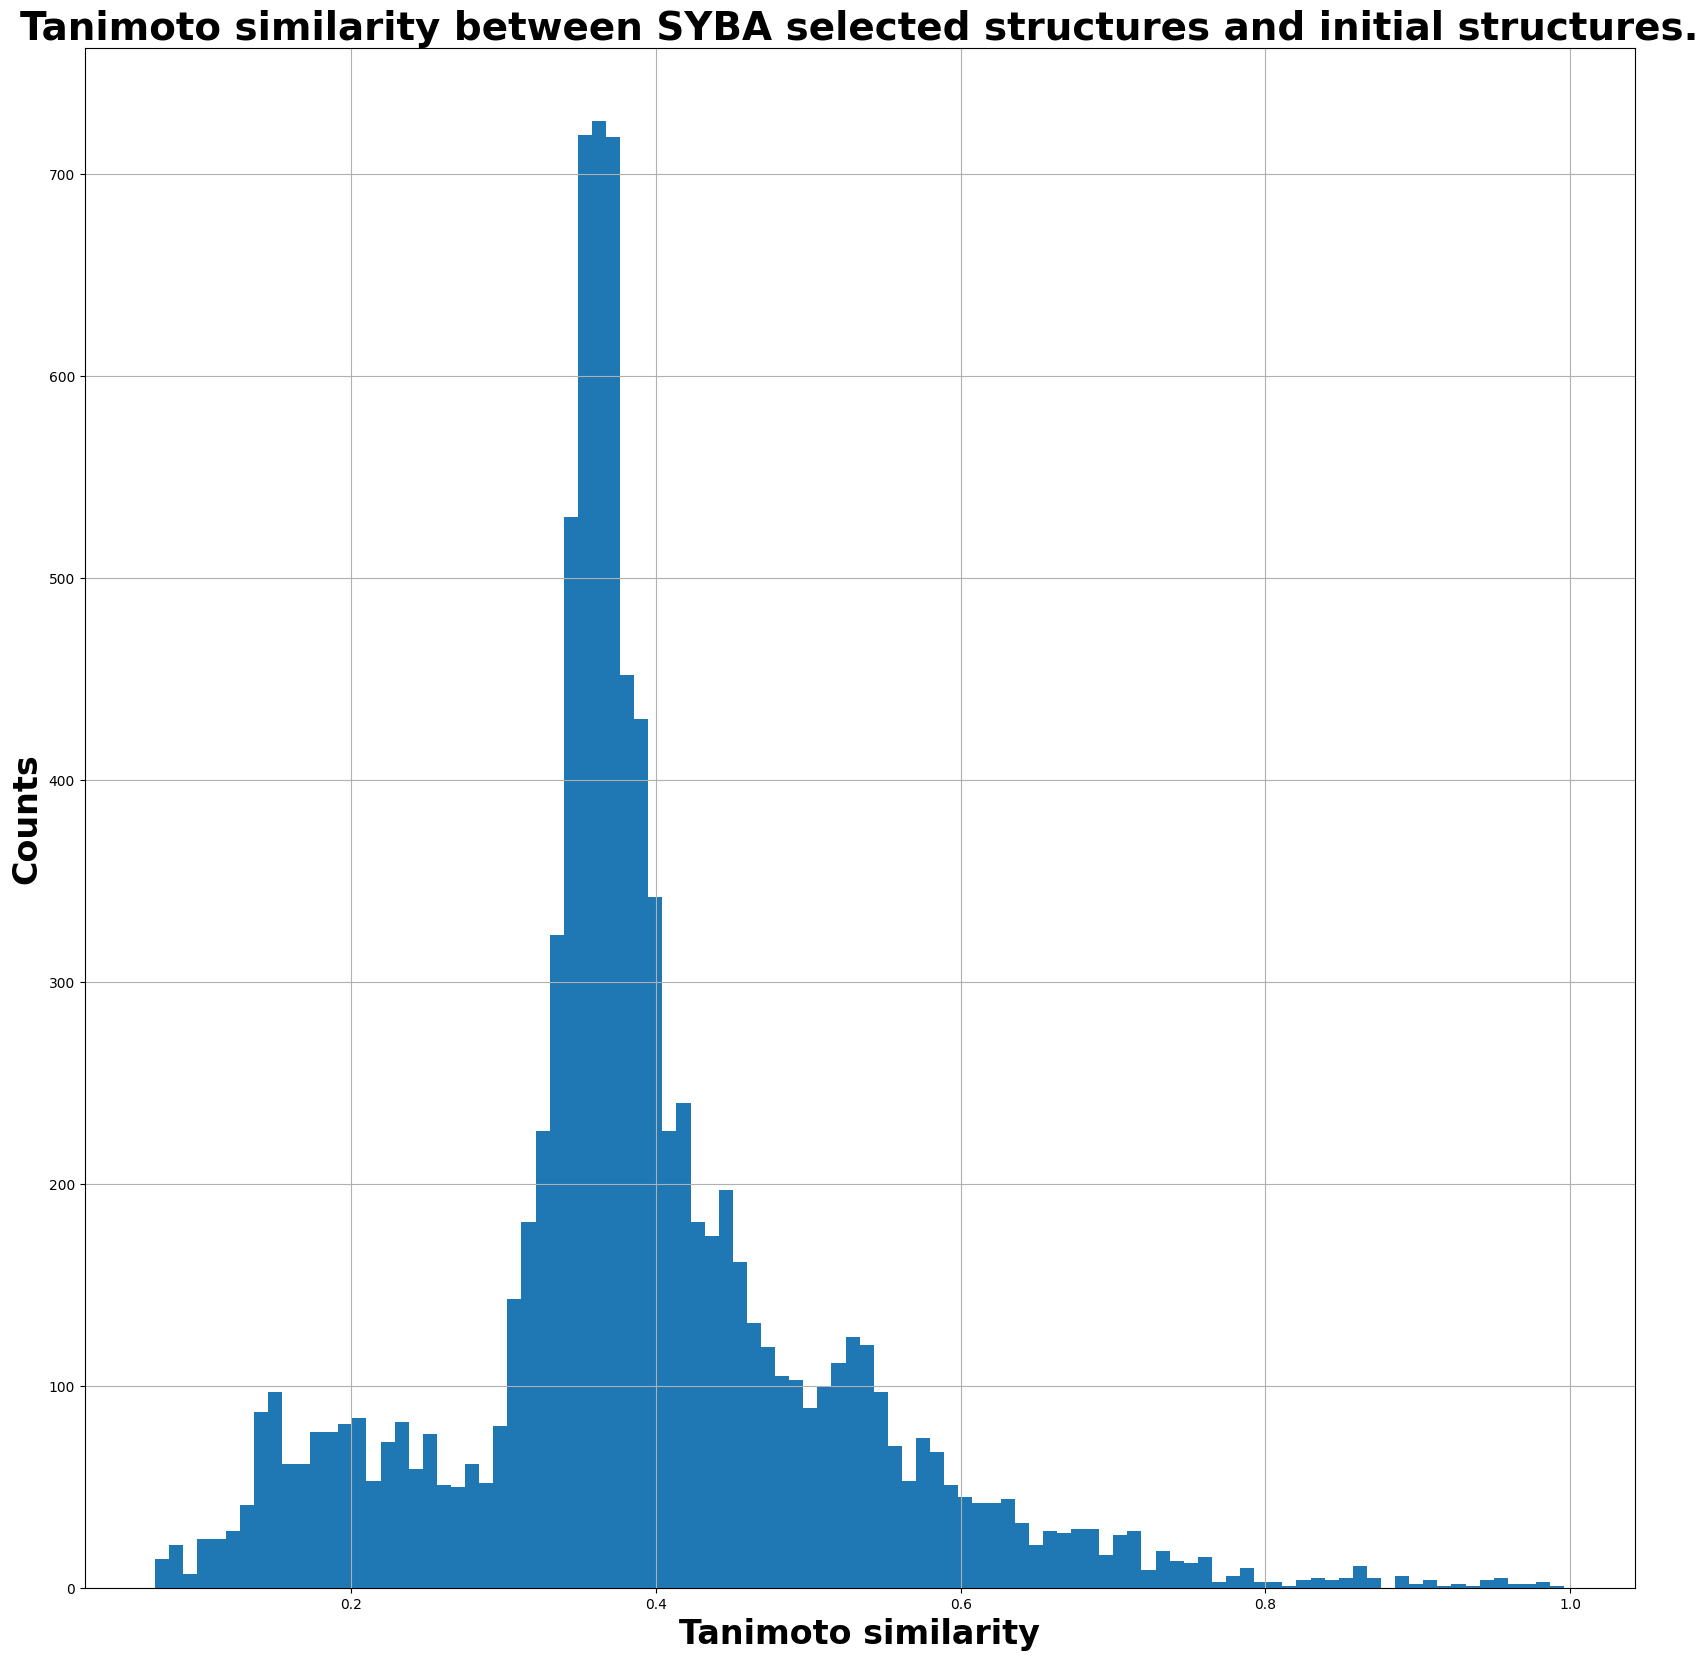

In [21]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(xc, bins=100)
plt.title('Tanimoto similarity between SYBA selected structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

In [22]:
gbn = total_hist[total_hist['All similarities'] > 0.5]

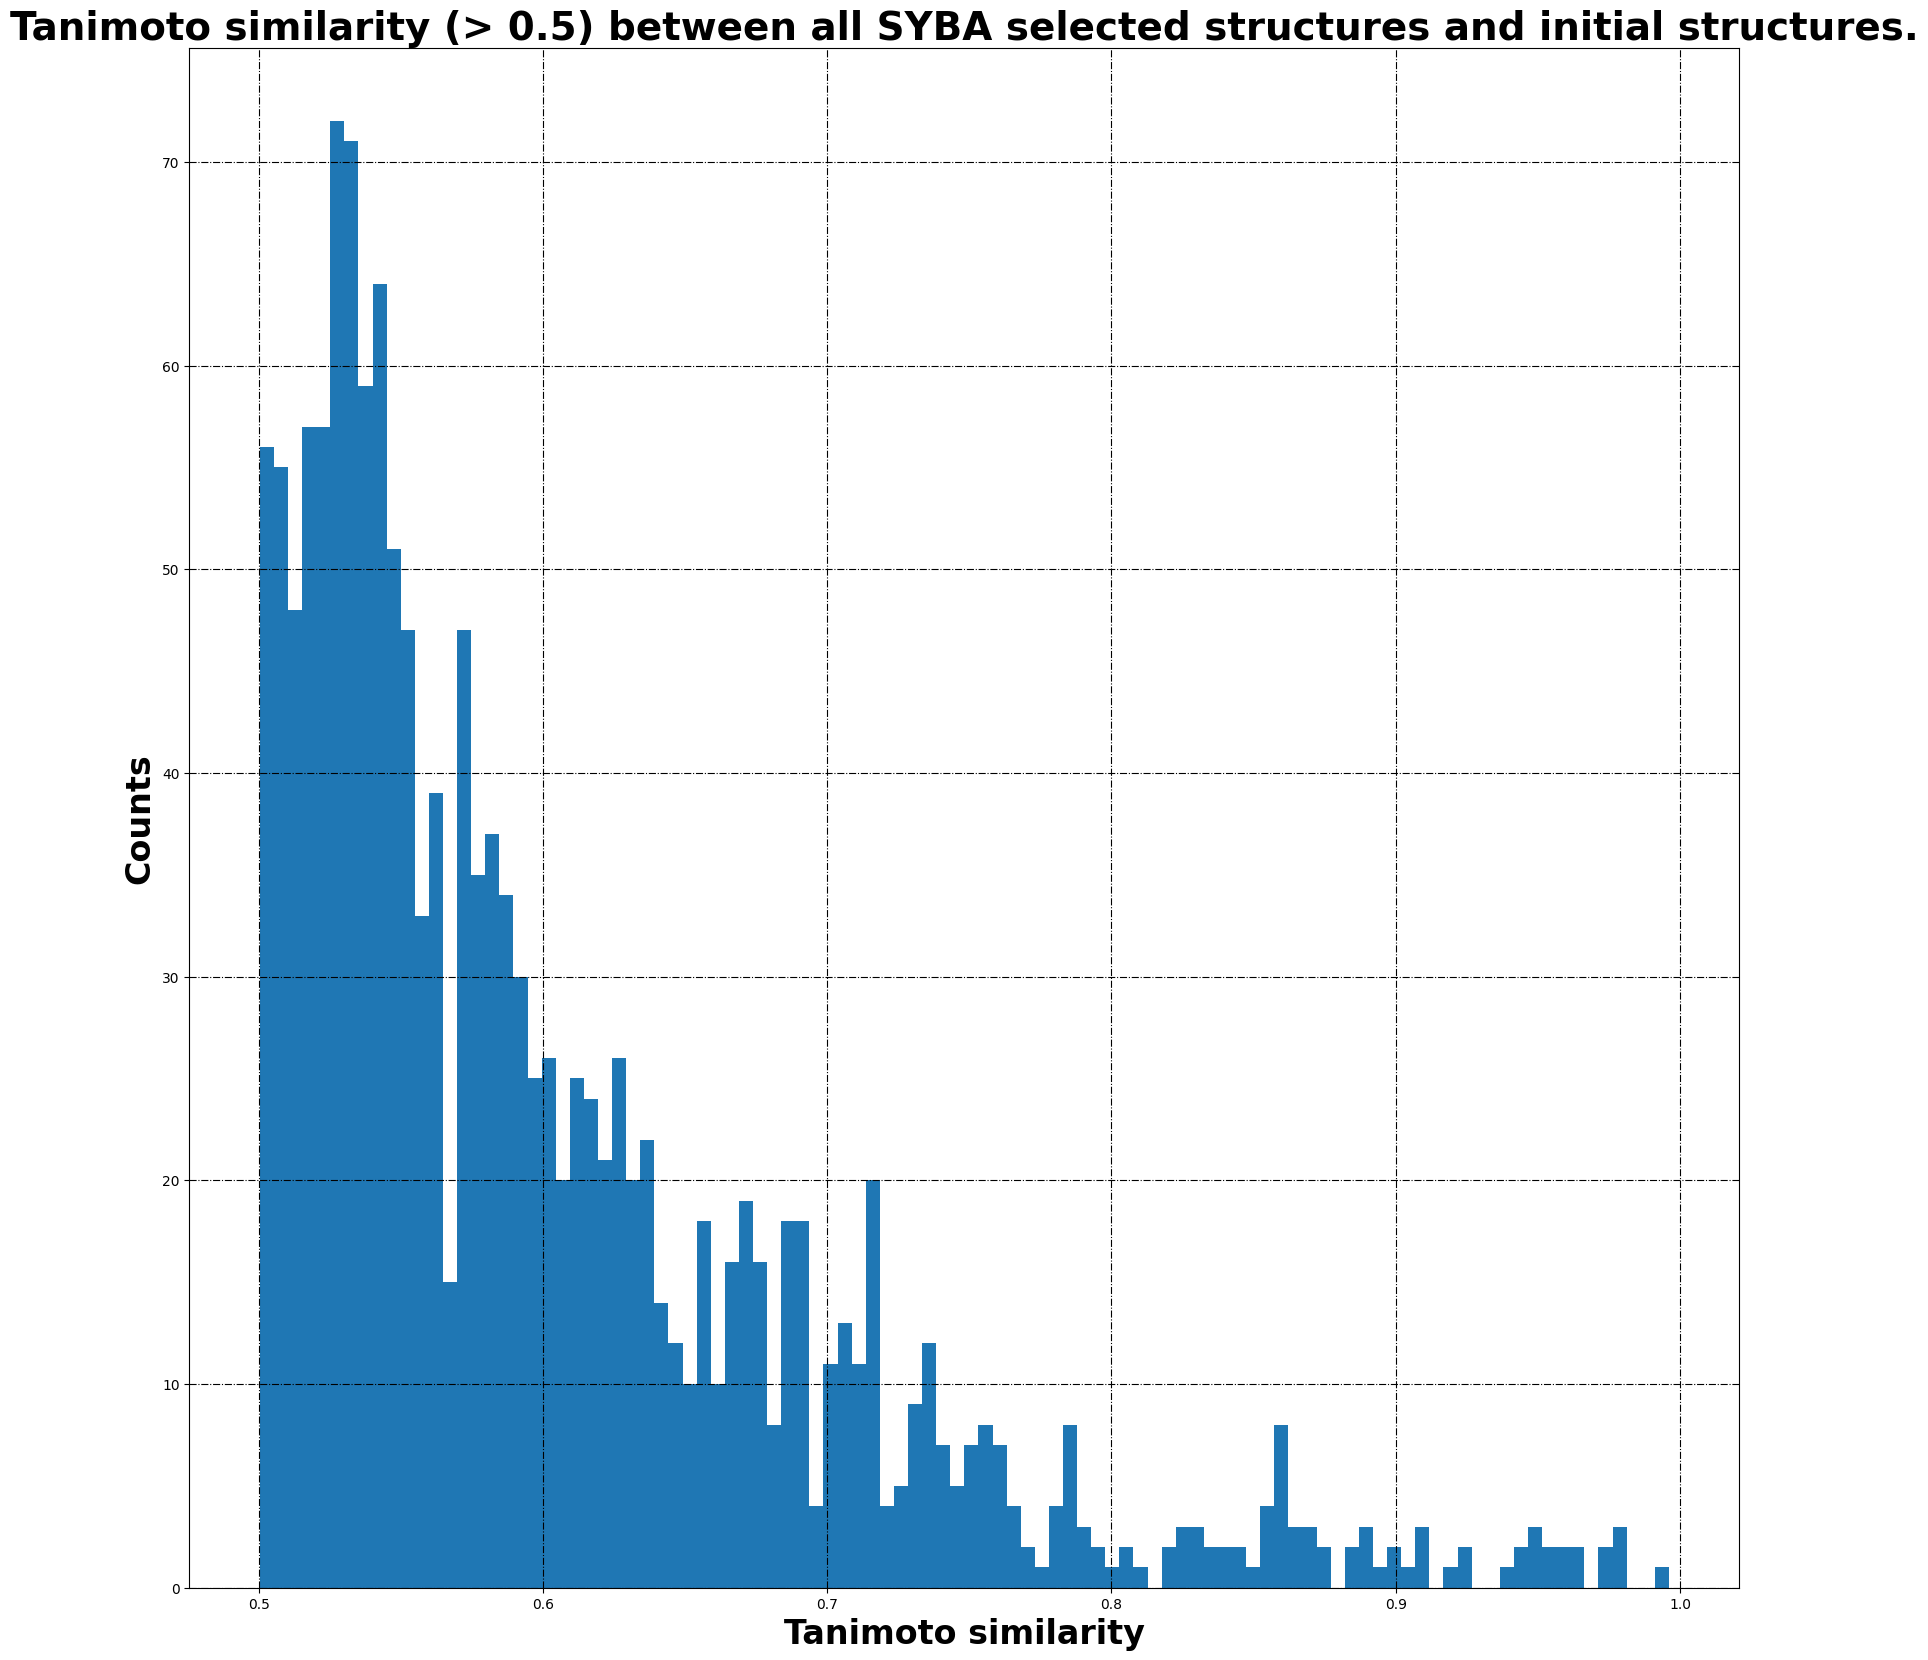

In [23]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(gbn, bins=100)
plt.title('Tanimoto similarity (> 0.5) between all SYBA selected structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

In [24]:
len(gbn)

1494

In [25]:
all_gen = pd.read_excel('../Data/generated_indoles.xlsx')

In [26]:
all_gen = all_gen['smiles']

In [27]:
finger_ini, finger_new_all = prepare_fingerprints(initial, all_gen)

In [28]:
final_list___ = initial.copy()
for i, element in enumerate(finger_ini):
    final_list___[i] = calculate_similarity(element, finger_new_all)

In [29]:
len(final_list___[0])

891

In [30]:
xc__ = []
for i in range(len(finger_ini)):
    xc__.extend(final_list___[i])

In [31]:
len(xc__)

39204

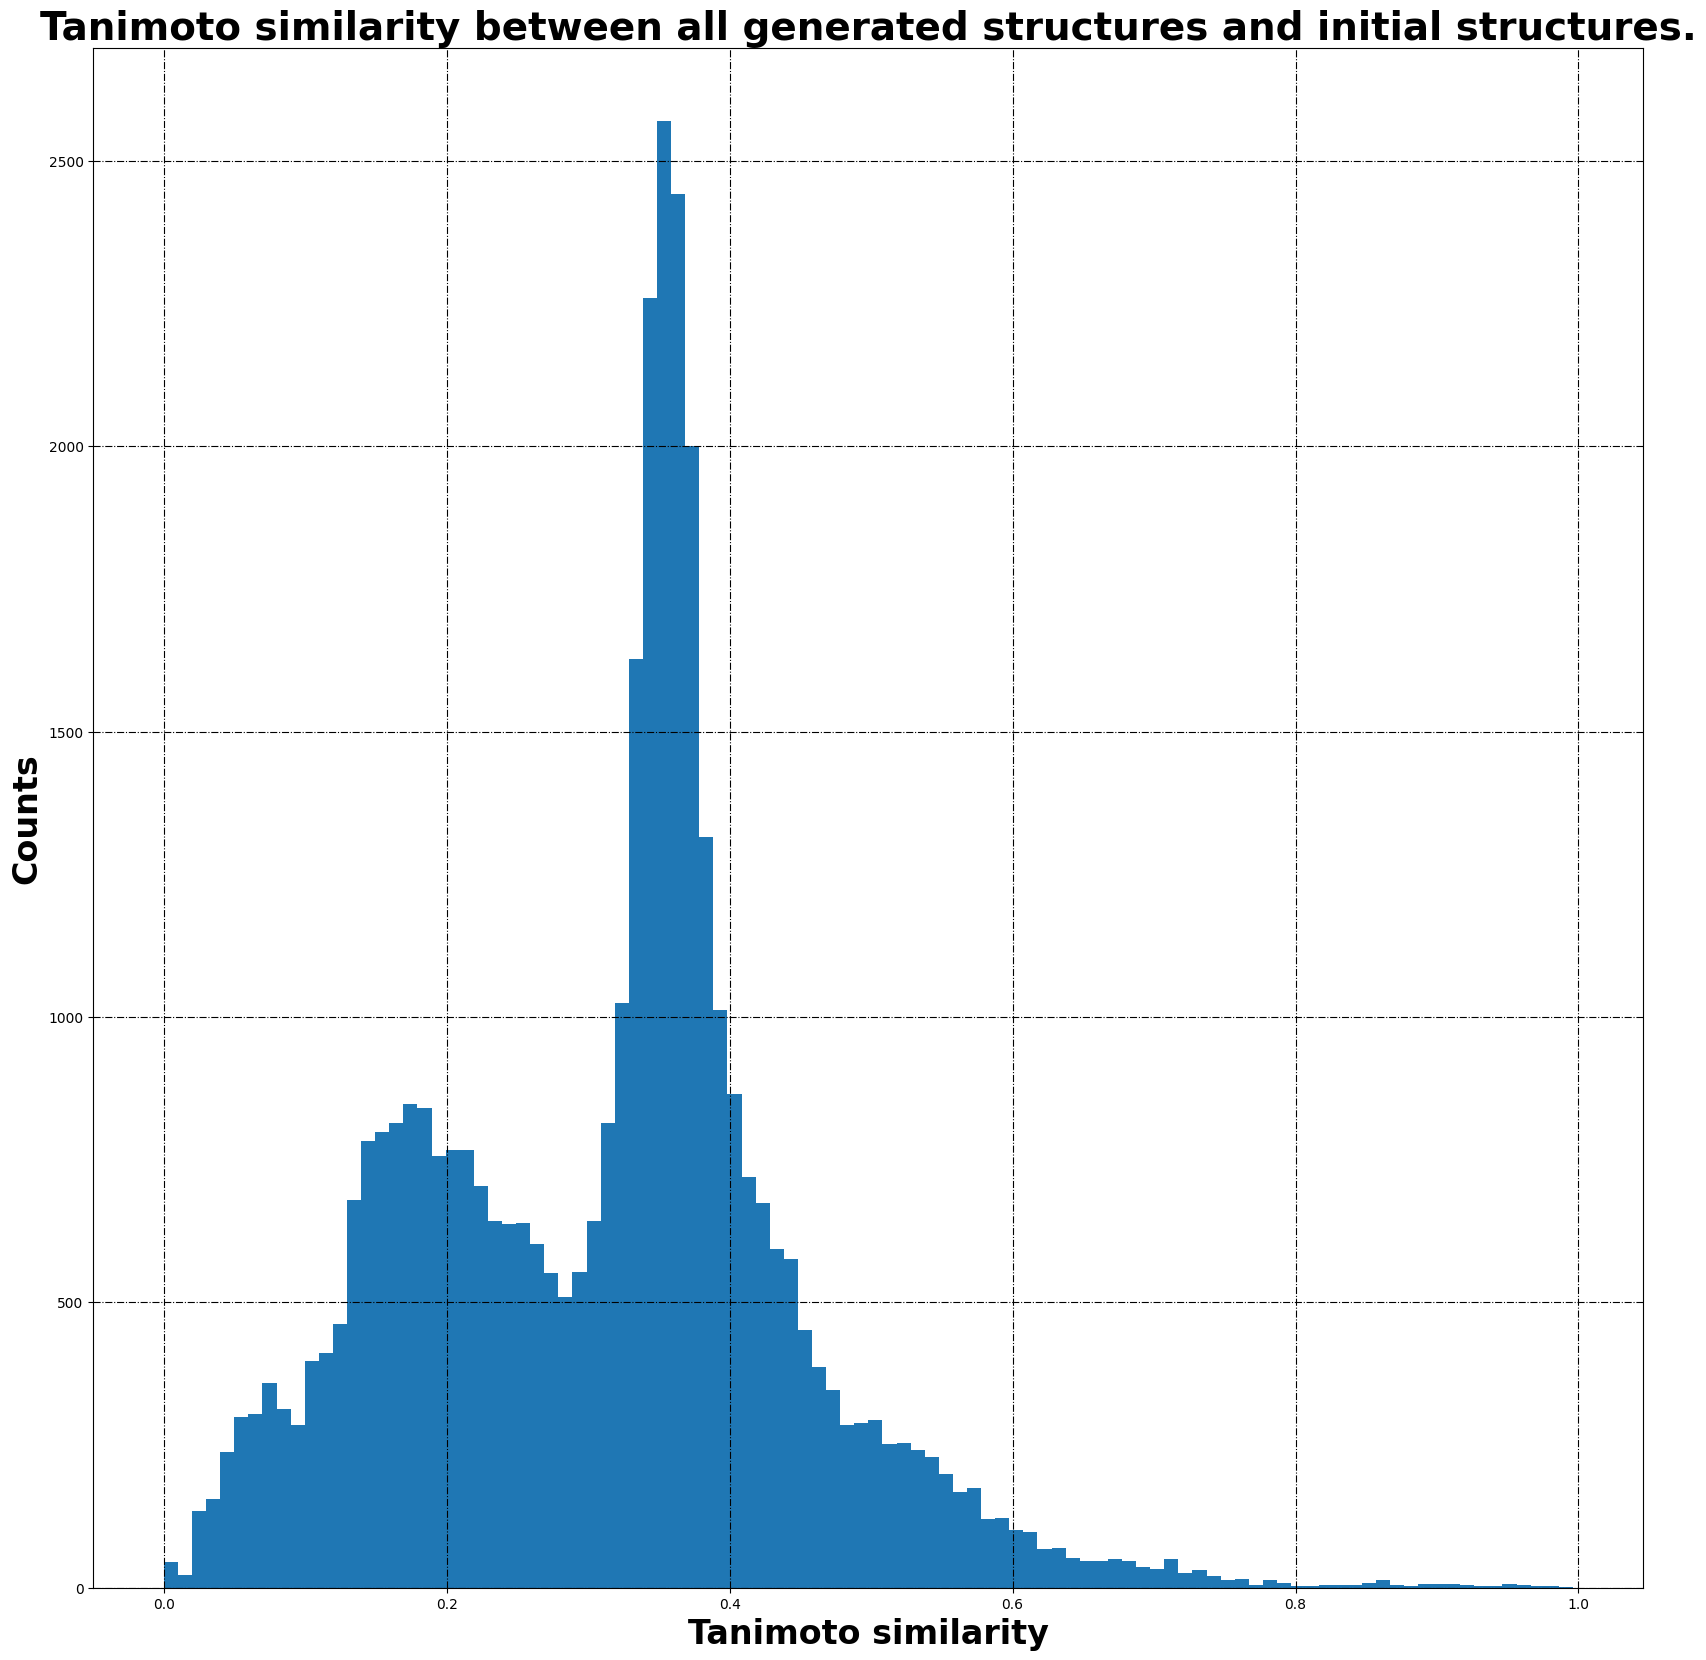

In [32]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(xc__, bins=100)
plt.title('Tanimoto similarity between all generated structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

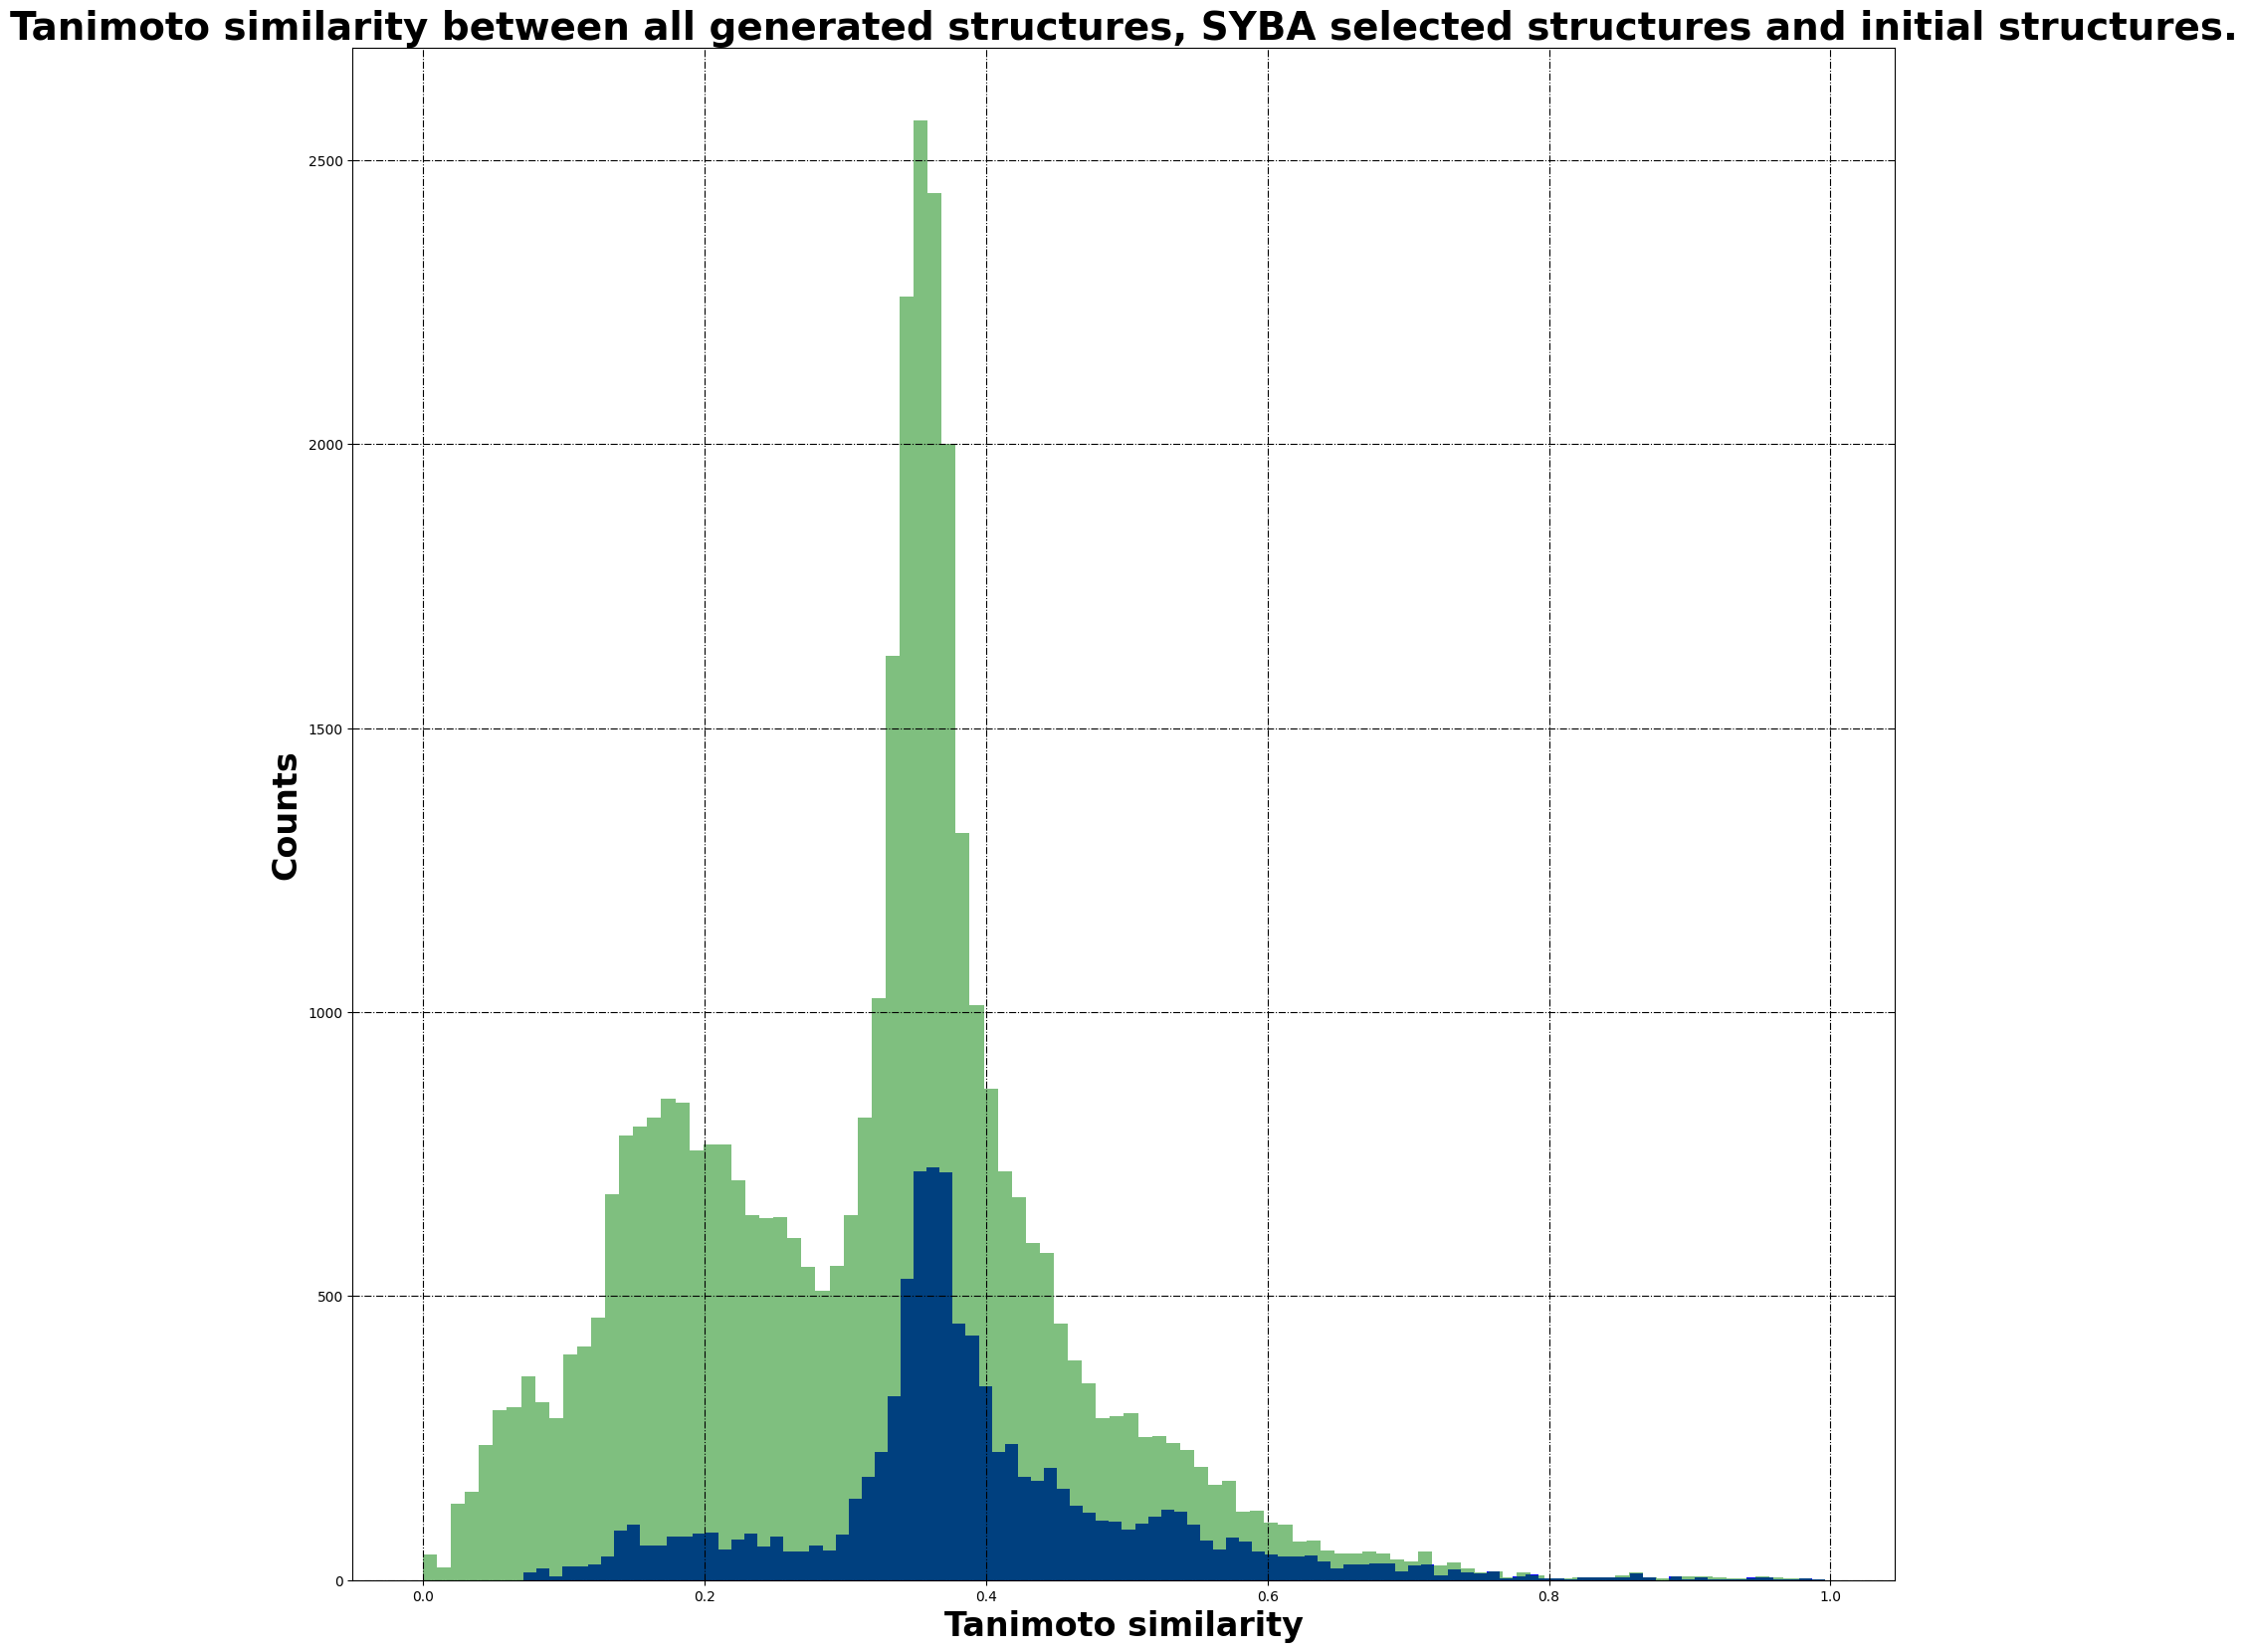

In [33]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(xc, bins=100, alpha=1, color='b', label='After selection')
plt.hist(xc__, bins=100, alpha=0.5, color='g', label='All generated')
plt.title('Tanimoto similarity between all generated structures, SYBA selected structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()